# 1. Convolution

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'roadSaP.png'
road_image = cv2.imread(image_path)
road_image = cv2.resize(road_image, (128, 93))
road_image = cv2.cvtColor(road_image, cv2.COLOR_BGR2RGB)

In [2]:
from scipy import signal
from scipy.special import comb

kernel_size = 5

# Mean kernel
mean_kernel = np.ones((kernel_size, kernel_size), np.float32) / kernel_size**2

# Gaussian kernel
gaussian_kernel = signal.windows.gaussian(kernel_size, std=1).reshape(kernel_size, 1)
gaussian_kernel = np.outer(gaussian_kernel, gaussian_kernel)
gaussian_kernel /= gaussian_kernel.sum()

# Binomial kernel
binomial_kernel = [comb(kernel_size - 1, i) for i in range(kernel_size)]
binomial_kernel = np.outer(binomial_kernel, binomial_kernel)
binomial_kernel /= binomial_kernel.sum()

print('Mean kernel:')
print(mean_kernel)
print('Gaussian kernel:')
print(gaussian_kernel)
print('Binomial kernel:')
print(binomial_kernel)

Mean kernel:
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]
Gaussian kernel:
[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]
Binomial kernel:
[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


In [3]:
mean_image = cv2.filter2D(road_image, -1, mean_kernel) 
binomial_image = cv2.filter2D(road_image, -1, gaussian_kernel)
gaussian_image = cv2.filter2D(road_image, -1, binomial_kernel)

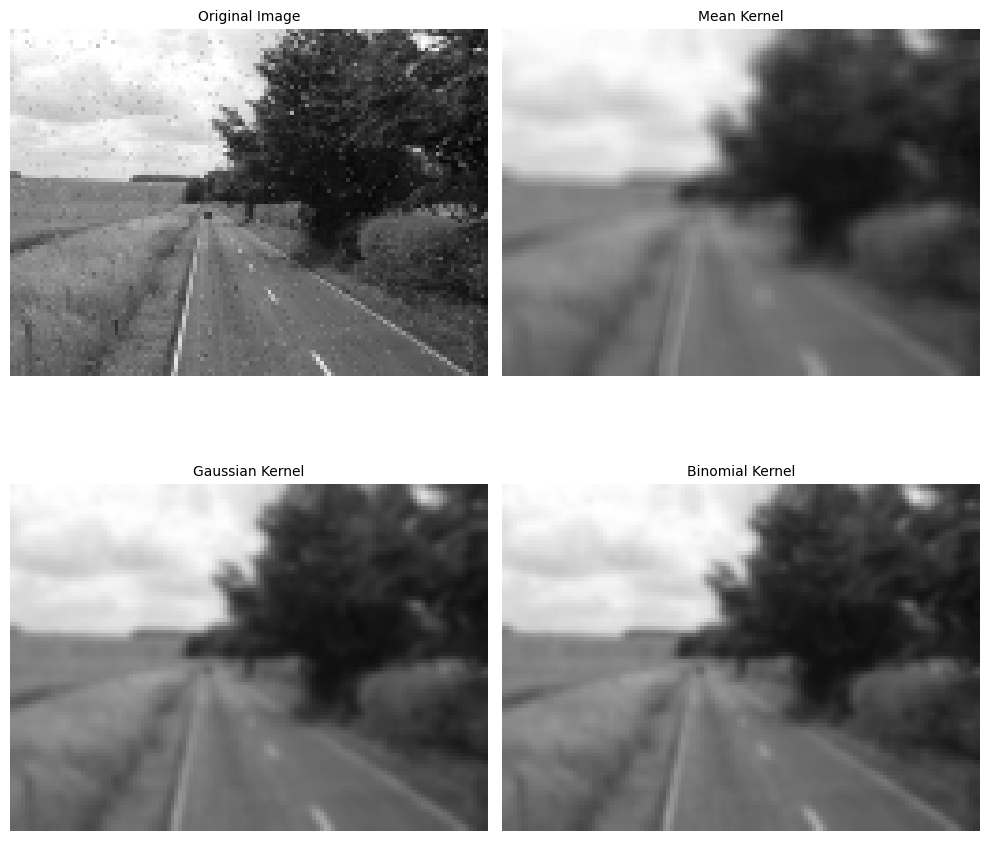

In [4]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title('Original Image', fontsize=10)
plt.imshow(road_image)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.title('Mean Kernel', fontsize=10)
plt.imshow(mean_image)
plt.axis('off')
plt.subplot(2, 2, 3)
plt.title('Gaussian Kernel', fontsize=10)
plt.imshow(gaussian_image)
plt.axis('off')
plt.subplot(2, 2, 4)
plt.title('Binomial Kernel', fontsize=10)
plt.imshow(binomial_image)
plt.axis('off')
plt.tight_layout()
plt.show()

# 2. Edge Detection

In [5]:
image = cv2.imread('SchwarzerKreis.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.astype(np.int16)

In [6]:
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], 
                    [0, 0, 0], 
                    [1, 2, 1]])

In [7]:
sobel_x_image = cv2.filter2D(image, -1, sobel_x)
sobel_y_image = cv2.filter2D(image, -1, sobel_y)

sobel_x_image = cv2.normalize(sobel_x_image, None, 0, 255, cv2.NORM_MINMAX)
sobel_y_image = cv2.normalize(sobel_y_image, None, 0, 255, cv2.NORM_MINMAX)

sobel_combined = cv2.addWeighted(sobel_x_image, 0.5, sobel_y_image, 0.5, 0)

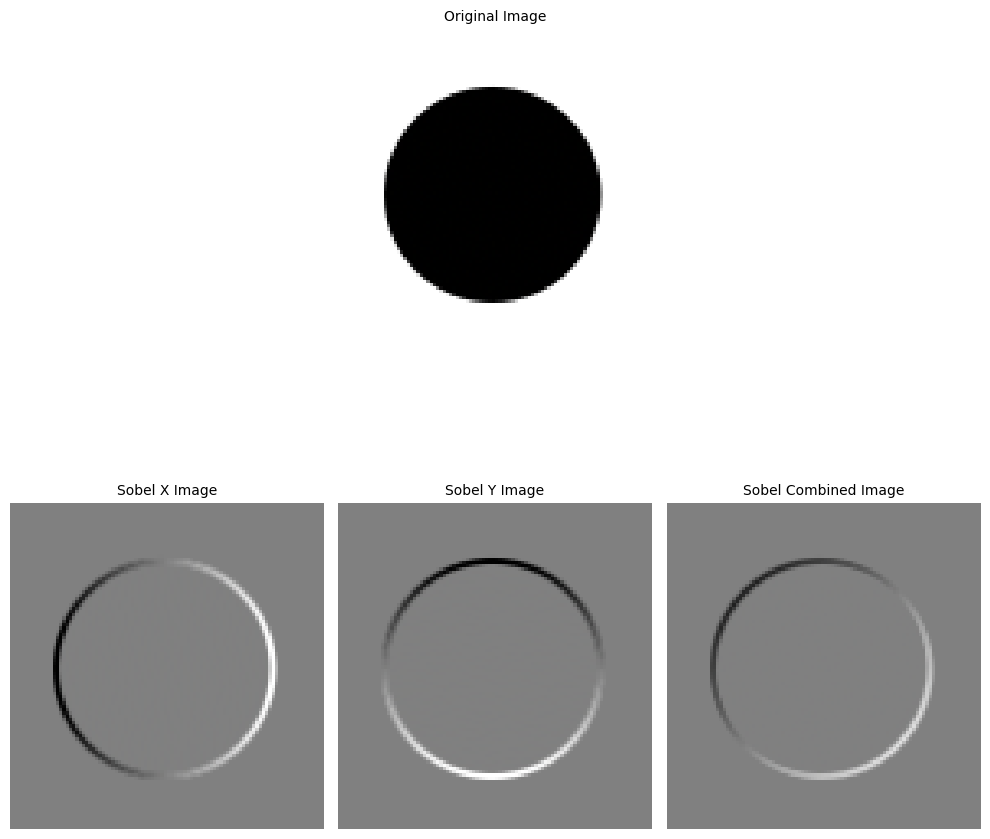

In [8]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 3, 2)
plt.title('Original Image', fontsize=10)
plt.imshow(image)
plt.axis('off')
plt.subplot(2, 3, 4)
plt.title('Sobel X Image', fontsize=10)
plt.imshow(sobel_x_image)
plt.axis('off')
plt.subplot(2, 3, 5)
plt.title('Sobel Y Image', fontsize=10)
plt.imshow(sobel_y_image)
plt.axis('off')
plt.subplot(2, 3, 6)
plt.title('Sobel Combined Image', fontsize=10)
plt.imshow(sobel_combined)
plt.axis('off')
plt.tight_layout()
plt.show()